In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [108]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [109]:
df['Churn'].value_counts(normalize=True)


,proportion
Churn,
No,0.73463
Yes,0.26537


In [110]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [112]:
for column in df.columns:
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print("-" * 20)

Unique values in column 'customerID':
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------
Unique values in column 'gender':
['Female' 'Male']
--------------------
Unique values in column 'SeniorCitizen':
[0 1]
--------------------
Unique values in column 'Partner':
['Yes' 'No']
--------------------
Unique values in column 'Dependents':
['No' 'Yes']
--------------------
Unique values in column 'tenure':
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------
Unique values in column 'PhoneService':
['No' 'Yes']
--------------------
Unique values in column 'MultipleLines':
['No phone service' 'No' 'Yes']
--------------------
Unique values in column 'InternetService':
['DSL' 'Fiber optic' 'No']
--------------------
Unique values in column 'OnlineSecur

In [113]:
def eda_target_vs_features(df, target):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns

    num_cols = [col for col in num_cols if col != target]
    cat_cols = [col for col in cat_cols if col != target]

    # Numeric
    for col in num_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=target, y=col, data=df)
        plt.title(f"{col} vs {target}")
        plt.show()

    # Categorical
    for col in cat_cols:
        plt.figure(figsize=(6,4))
        sns.countplot(x=col, hue=target, data=df)
        plt.title(f"{col} vs {target}")
        plt.xticks(rotation=45)
        plt.show()


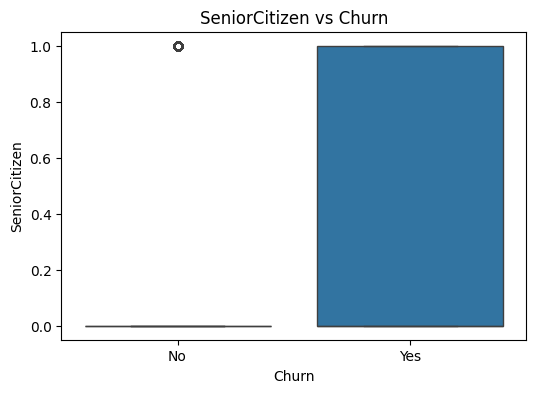

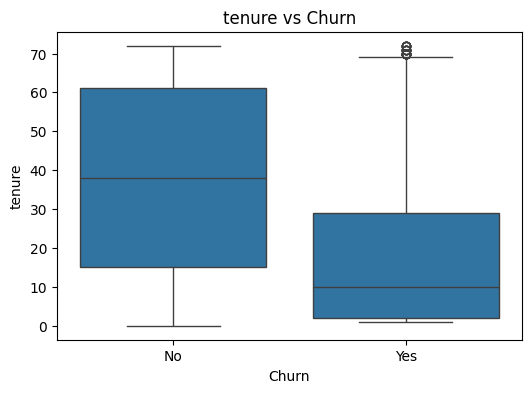

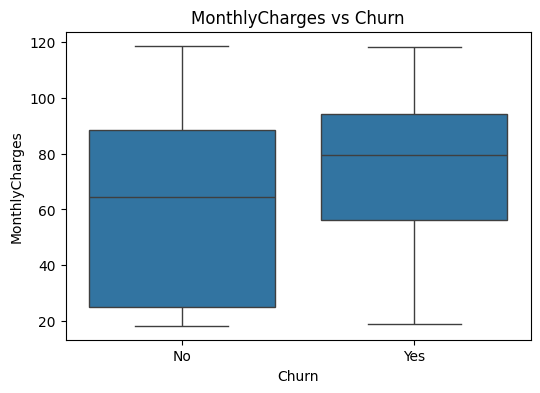

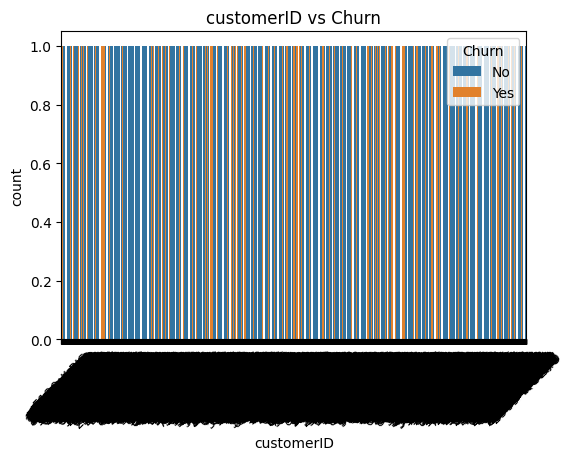

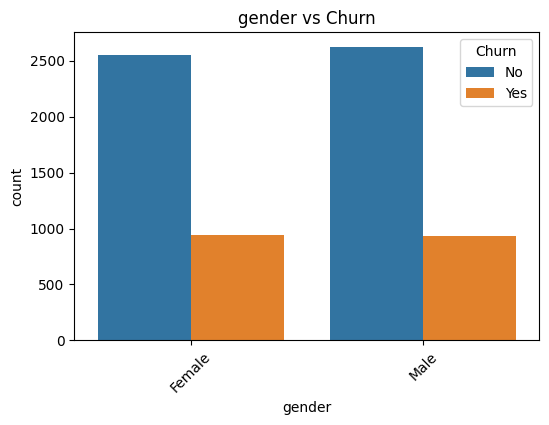

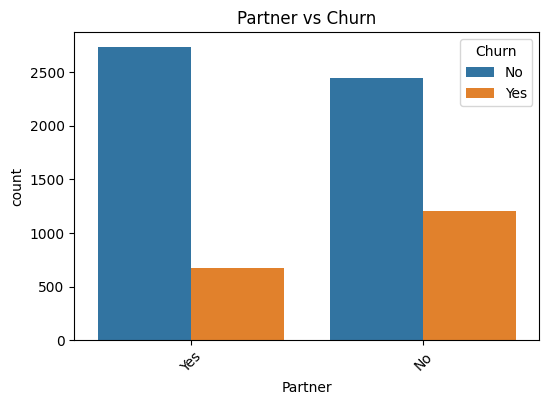

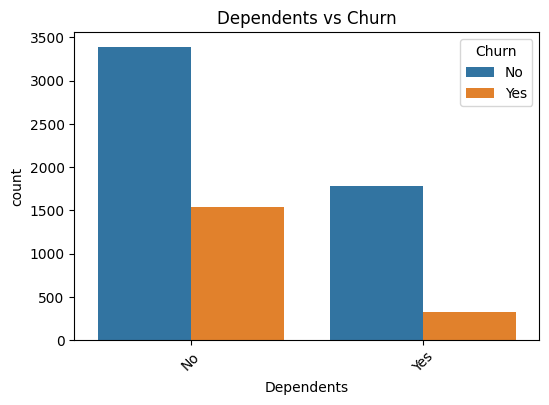

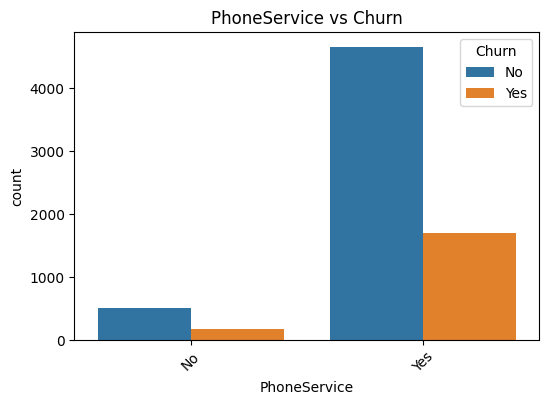

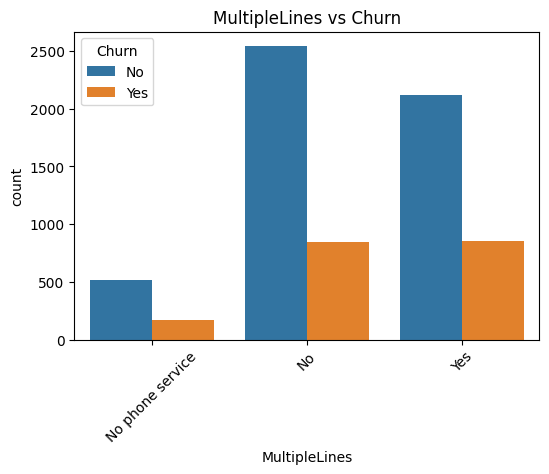

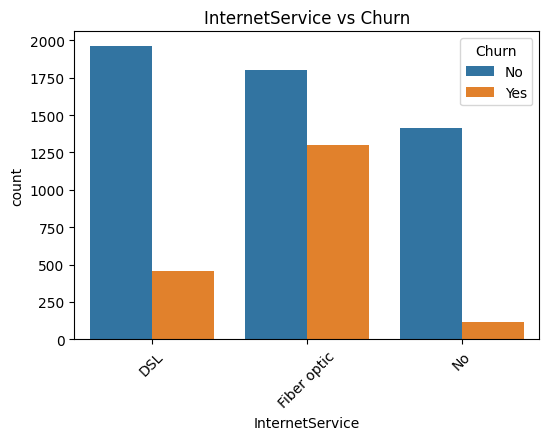

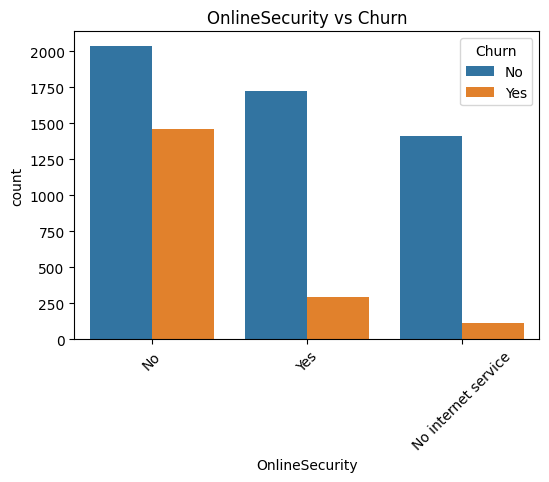

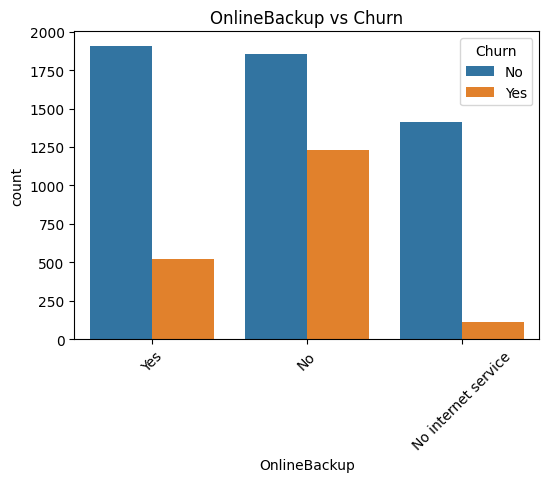

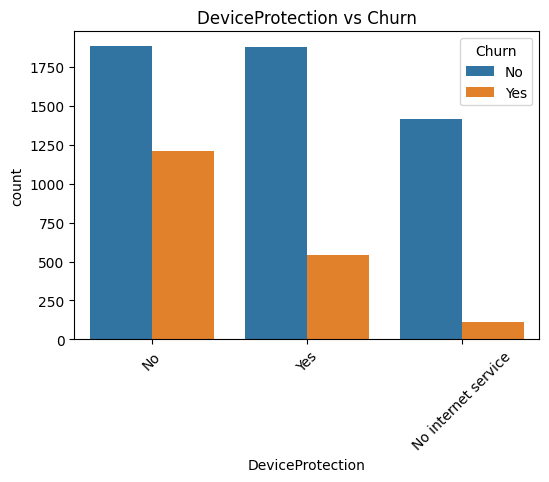

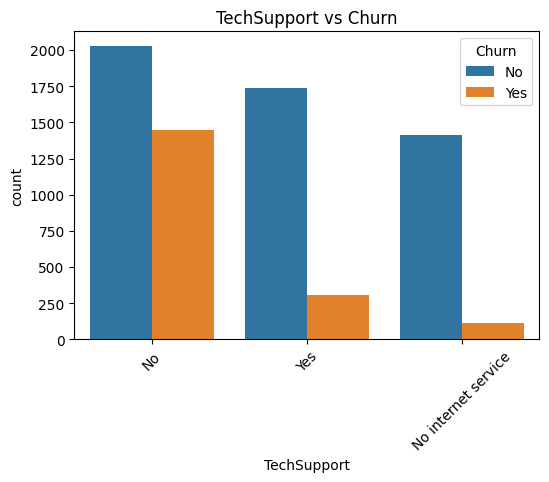

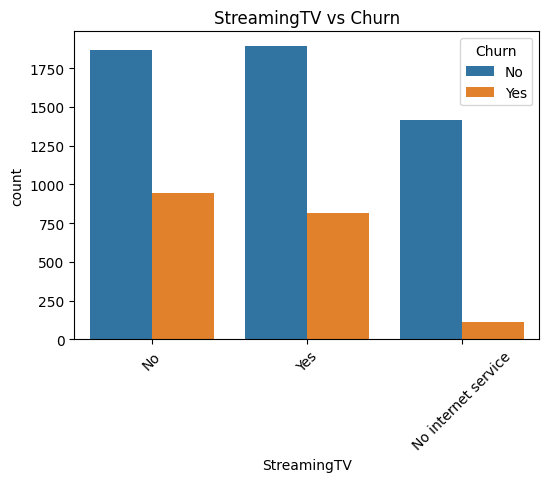

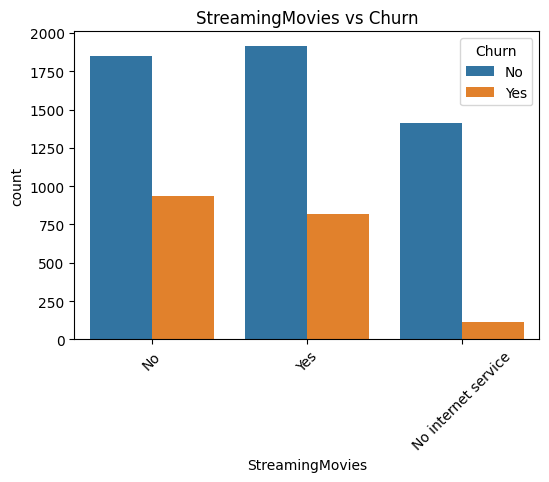

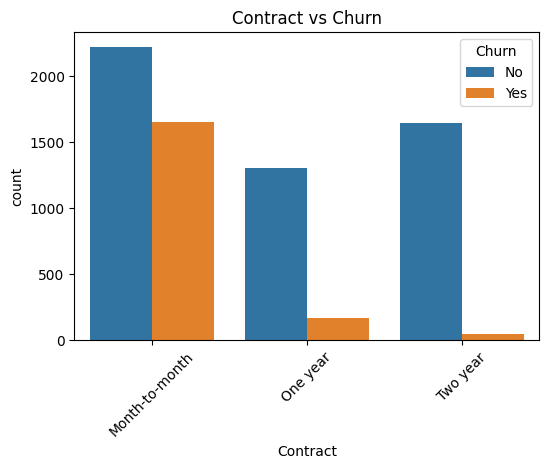

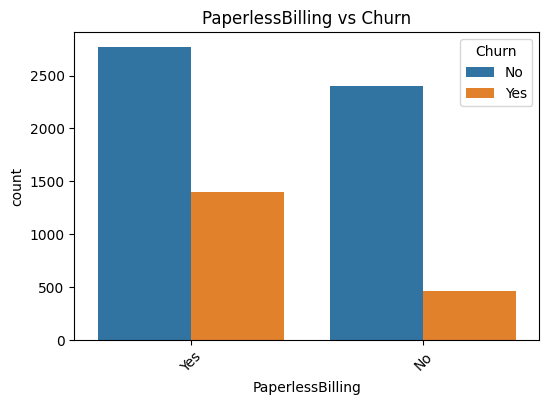

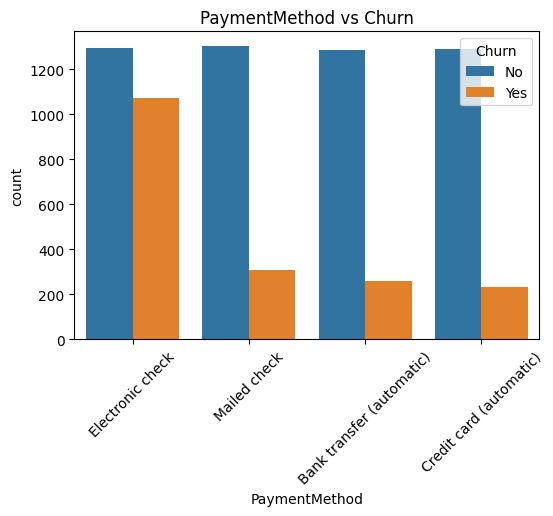

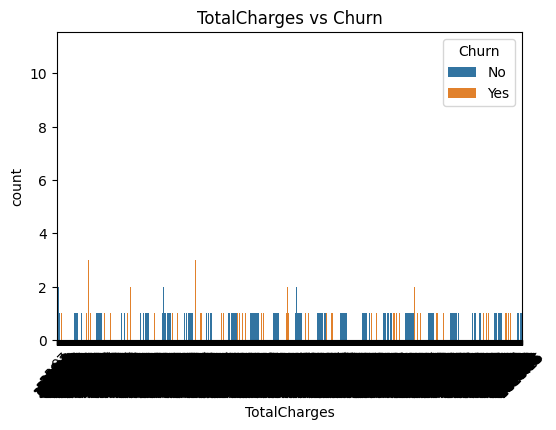

In [114]:
eda_target_vs_features(df, 'Churn')


In [115]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns_to_encode=['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in columns_to_encode:
  df[col]=le.fit_transform(df[col])

In [116]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [117]:
cat_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaymentMethod'
]

existing_cols = [col for col in cat_cols if col in df.columns]

df = pd.get_dummies(
    df,
    columns=existing_cols,
    drop_first=True,
    dtype=int
)


In [118]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,1,0,1,0,Month-to-month,1,29.85,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,One year,0,56.95,...,1,0,0,0,0,0,0,0,0,1
2,3668-QPYBK,Male,0,0,0,2,1,Month-to-month,1,53.85,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,Male,0,0,0,45,0,One year,0,42.30,...,1,0,1,0,0,0,0,0,0,0
4,9237-HQITU,Female,0,0,0,2,1,Month-to-month,1,70.70,...,0,0,0,0,0,0,0,0,1,0


In [119]:
contract_map = {
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}
df['Contract']=df['Contract'].map(contract_map)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   object 
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   Contract                               7043 non-null   int64  
 8   PaperlessBilling                       7043 non-null   int64  
 9   MonthlyCharges                         7043 non-null   float64
 10  TotalCharges                           7043 non-null   object 
 11  Chur

In [121]:
df['gender']=df['gender'].map({'Male':1,'Female':0})

In [122]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   Contract                               7043 non-null   int64  
 8   PaperlessBilling                       7043 non-null   int64  
 9   MonthlyCharges                         7043 non-null   float64
 10  TotalCharges                           7032 non-null   float64
 11  Chur

In [124]:
df.shape

(7043, 31)

In [125]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.00,1.000,1.0000,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.00,0.000,1.0000,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.00,0.000,1.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.00,1.000,1.0000,1.00
Contract,7043.0,0.690473,0.833755,0.00,0.00,0.000,1.0000,2.00
PaperlessBilling,7043.0,0.592219,0.491457,0.00,0.00,1.000,1.0000,1.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [126]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
Contract,0
PaperlessBilling,0
MonthlyCharges,0


In [127]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

In [128]:
df.isnull().sum().sum()

np.int64(0)

In [129]:
df.duplicated().sum()

np.int64(0)

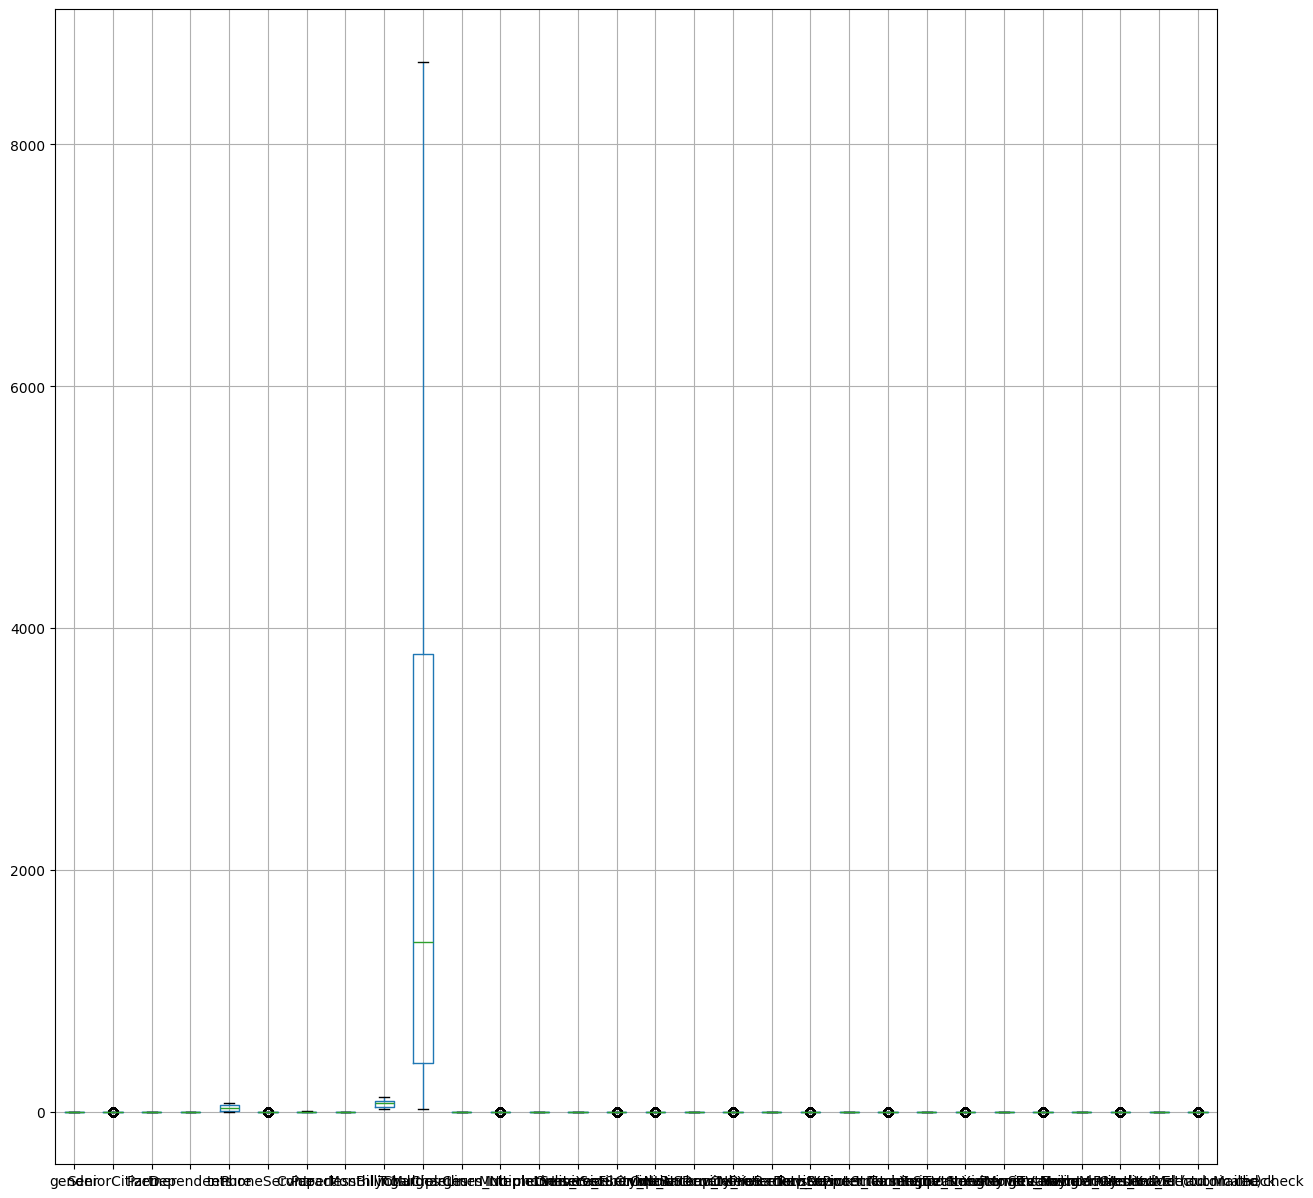

In [130]:
plt.figure(figsize=(15,15))
df.boxplot()
plt.show()

In [131]:
Target=df['Churn']
Feature=df.drop(columns=['customerID', 'Churn'])

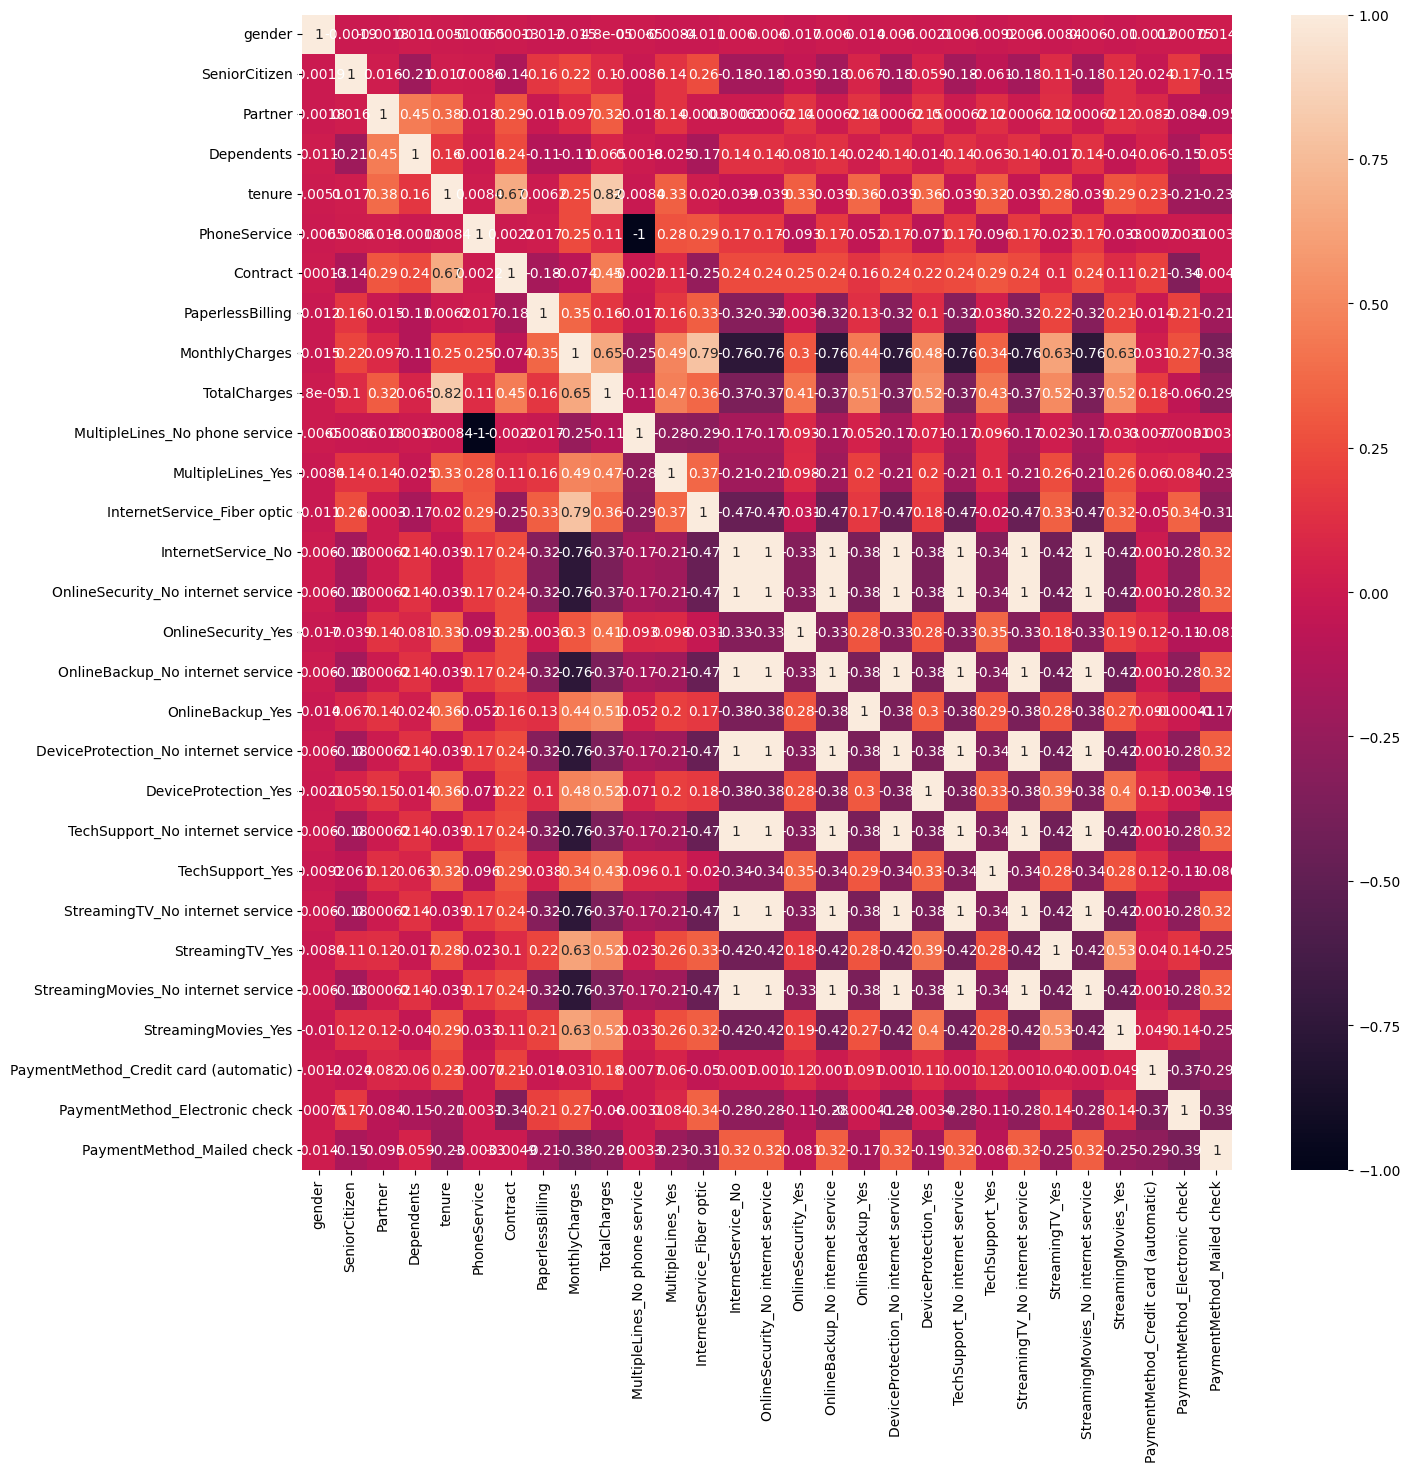

In [132]:
plt.figure(figsize=(15,15))
sns.heatmap(Feature.corr(),annot=True)
plt.show()

In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(Feature,Target,train_size=0.80,random_state=50,stratify=Target)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5634, 29)
(1409, 29)
(5634,)
(1409,)


In [148]:
for col in Feature.columns:
  print(f'{col}',Feature[col].unique())

gender [0 1]
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService [0 1]
Contract [0 1 2]
PaperlessBilling [1 0]
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
MultipleLines_No phone service [1 0]
MultipleLines_Yes [0 1]
InternetService_Fiber optic [0 1]
InternetService_No [0 1]
OnlineSecurity_No internet service [0 1]
OnlineSecurity_Yes [0 1]
OnlineBackup_No internet service [0 1]
OnlineBackup_Yes [1 0]
DeviceProtection_No internet service [0 1]
DeviceProtection_Yes [0 1]
TechSupport_No internet service [0 1]
TechSupport_Yes [0 1]
StreamingTV_No internet service [0 1]
StreamingTV_Yes [0 1]
StreamingMovies_No internet service [0 1]
StreamingMovies_Yes [0 1]
PaymentMethod_Cr

In [149]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [150]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [151]:
Y_pred=lr.predict(X_test)

In [152]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
print(accuracy_score(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))
print(recall_score(Y_test,Y_pred))
print(f1_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))




0.7877927608232789
0.6198083067092651
0.5187165775401069
0.5647743813682679
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



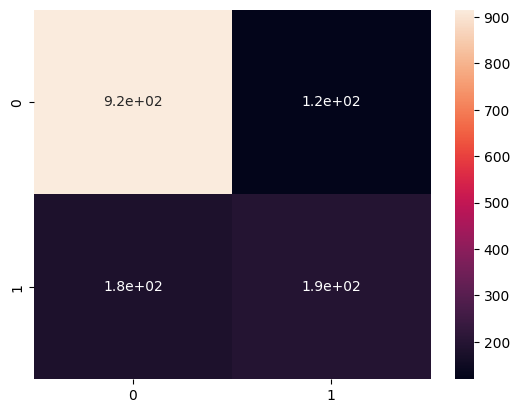

In [153]:
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [157]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,bootstrap=True,random_state=30,max_features='sqrt',max_depth=7)
rf.fit(X_train,Y_train)


RandomForestClassifier(max_depth=7, random_state=30)

0.7785663591199432
0.6076388888888888
0.4679144385026738
0.5287009063444109
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1035
           1       0.61      0.47      0.53       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



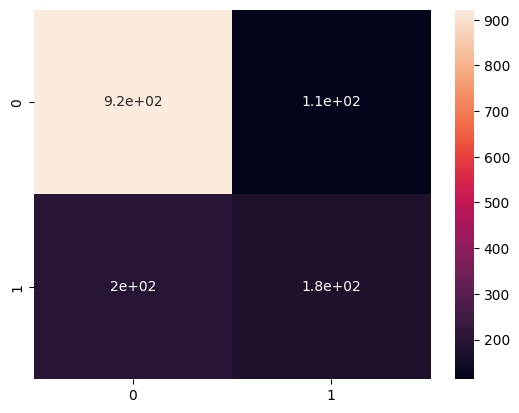

In [158]:
Y_pred1=rf.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))
print(recall_score(Y_test,Y_pred1))
print(f1_score(Y_test,Y_pred1))
print(classification_report(Y_test,Y_pred1))
cm1=confusion_matrix(Y_test,Y_pred1)
sns.heatmap(cm1,annot=True)
plt.show()

In [159]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
feat_imp.head(10)


,0
tenure,0.186549
Contract,0.183182
TotalCharges,0.138699
MonthlyCharges,0.081865
InternetService_Fiber optic,0.079490
PaymentMethod_Electronic check,0.058660
TechSupport_Yes,0.031782
OnlineSecurity_Yes,0.027070
StreamingTV_No internet service,0.022821
OnlineBackup_No internet service,0.017609


In [160]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'class_weight': [{0:1, 1:5}, {0:1, 1:7}]
        }
    },

    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'class_weight': [{0:1, 1:5}]
        }
    },

    'GradientBoosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        }
    }
}


In [161]:
from sklearn.metrics import roc_auc_score
results = []

for name, config in models.items():
    print(f"\nTraining {name}...")

    grid = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring='recall',     # IMPORTANT for churn
        cv=5,
        n_jobs=-1
    )

    grid.fit(X_train, Y_train)

    best_model = grid.best_estimator_

    Y_pred = best_model.predict(X_test)
    Y_prob = best_model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(Y_test, Y_pred)
    roc = roc_auc_score(Y_test, Y_prob)
    cm = confusion_matrix(Y_test, Y_pred)

    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Accuracy': acc,
        'ROC_AUC': roc,
        'Confusion Matrix': cm
    })

    print("Best Params:", grid.best_params_)
    print("Accuracy:", acc)
    print("ROC-AUC:", roc)
    print("Confusion Matrix:\n", cm)




Training LogisticRegression...
Best Params: {'C': 0.01, 'class_weight': {0: 1, 1: 7}}
Accuracy: 0.6075230660042583
ROC-AUC: 0.8266940504792167
Confusion Matrix:
 [[504 531]
 [ 22 352]]

Training RandomForest...
Best Params: {'class_weight': {0: 1, 1: 5}, 'max_depth': 10, 'n_estimators': 100}
Accuracy: 0.7402413058907026
ROC-AUC: 0.8264951303314475
Confusion Matrix:
 [[749 286]
 [ 80 294]]

Training GradientBoosting...
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.7629524485450674
ROC-AUC: 0.8138572425017437
Confusion Matrix:
 [[895 140]
 [194 180]]


### Although Logistic Regression has lower accuracy, it significantly minimizes false negatives, which aligns with the business objective of reducing churn-related revenue loss.

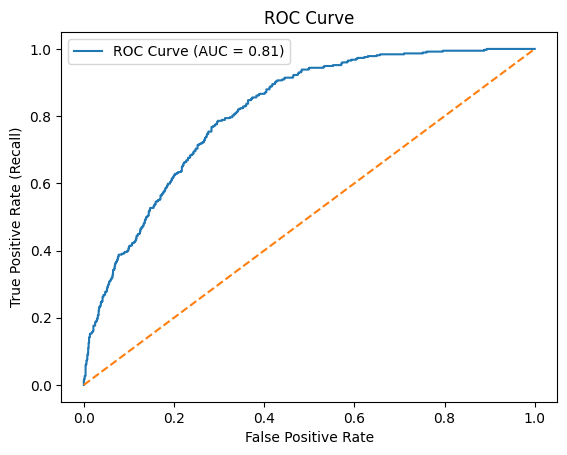

In [162]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = roc_auc_score(Y_test, Y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()


### The final model prioritizes recall over accuracy due to the high business cost of false negatives in churn prediction. By reducing missed churners to fewer than 2% of actual churn cases, the model enables proactive retention strategies, even at the expense of increased false positives.